# Ridge Regression

In [195]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
import numpy as np

In [196]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

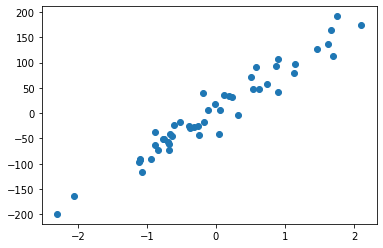

In [197]:
plt.scatter(X, y)

In [198]:
rr = Ridge(alpha=0)
rr.fit(X, y)
w = rr.coef_
rr.intercept_, w

(5.461106129084673, array([84.93241565]))

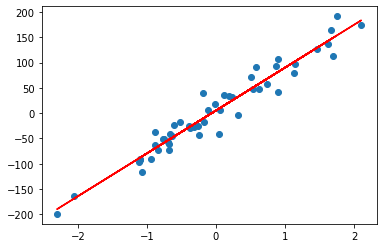

In [199]:
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

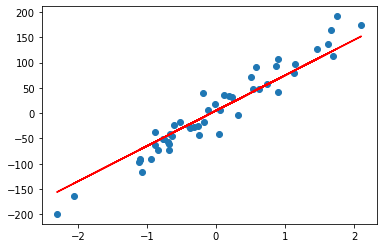

In [200]:
rr = Ridge(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [201]:
rr.coef_

array([70.03334293])

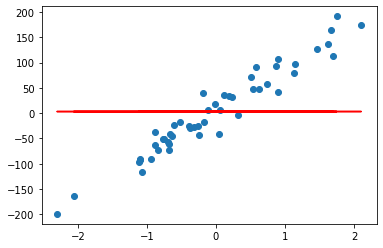

In [202]:
rr = Ridge(alpha=1000000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [203]:
rr.intercept_, rr.coef_

(3.294170310146944, array([0.00399207]))

## Lasso Regression

#### Fit a linear model using sklearn with Lasso regularization

In [204]:
from sklearn.linear_model import Lasso

In [205]:
rr = Lasso(alpha=0.1)
rr.fit(X, y)
w = rr.coef_
rr.intercept_, w

(5.458392082032524, array([84.82604437]))

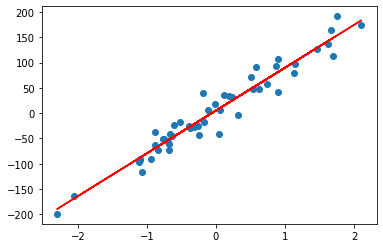

In [206]:
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

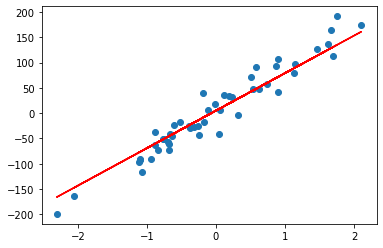

In [207]:
rr = Lasso(alpha=10)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

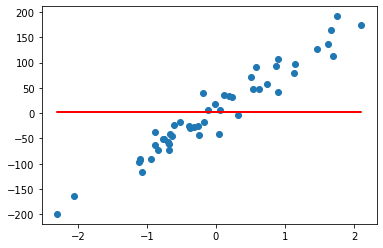

In [208]:
rr = Lasso(alpha=1000000)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, rr.intercept_ + w*X, c='red')

In [209]:
rr.intercept_, rr.coef_

(3.29406845296282, array([0.]))

## Implement function
`fit_1d_ridge_regression` that takes two vectors $x$ and $y$ and int lmb, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope using ridge regression matrix form.

In [210]:
def fit_1d_ridge_regression(data_vector, response_vector, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    """
    #TODO (closed form solution or gradient descent)
    X = data_vector
    y = response_vector
    X = X - np.mean(X, axis=0)
    return np.linalg.inv(X.T.dot(X) + lmb * np.eye(X.shape[1])).dot(X.T).dot(y)

In [211]:
w = fit_1d_ridge_regression(X, y, 3)

In [212]:
def fit_1d_lasso_regression(data_vector, response_vector, n_iterations = 1000, learning_rate = 0.1, lmb=1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
#     #TODO (Gradient descent ((full) batch gradient descent, stochastic gradient descent or mini-batch (stochastic) gradient descent))

    X = data_vector
    y = response_vector
    X = np.column_stack((np.ones(len(X)), X))
    beta = np.zeros(X.shape[1])
    beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:])) / (X.shape[0])
    for iteration in range(n_iterations):
        start = 1
        for j in range(start, len(beta)):
            tmp_beta = beta.copy()
            tmp_beta[j] = 0.0
            r_j = y - np.dot(X, tmp_beta)
            arg1 = np.dot(X[:, j], r_j)
            arg2 = lmb
            if arg1 > 0.0 and arg2 < abs(arg1):
                treshold = arg1 - arg2
            elif arg1 < 0.0 and arg2 < abs(arg1):
                treshold = arg1 + arg2
            else:
                treshold = 0.0
            beta[j] = treshold / (X[:, j]**2).sum()
            beta[0] = np.sum(y - np.dot(X[:, 1:], beta[1:])) / (X.shape[0])
    return beta

# Apply your implemented lasso and ridge regression functions to the data and plot the results with matplotlib

In [213]:
w = fit_1d_ridge_regression(X, y, 10)
rr = Ridge(10).fit(X, y)

In [214]:
print("My result: ", w)
print("Ridge from sklearn: ", rr.coef_)

My result:  [70.03334293]
Ridge from sklearn:  [70.03334293]


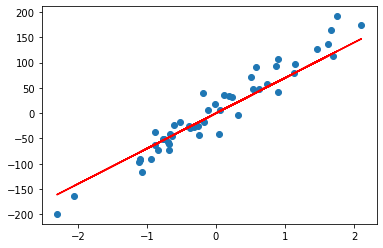

In [215]:
plt.scatter(X, y)
plt.plot(X, X @ w, c='red')

In [216]:
beta = fit_1d_lasso_regression(X, y, lmb=0.1)
rr = Lasso(0.1).fit(X, y)

In [217]:
print("My result: ", beta[1:], beta[0])
print("Lasso from sklearn: ", rr.coef_, rr.intercept_)

My result:  [84.93028822] 5.46105184814363
Lasso from sklearn:  [84.82604437] 5.458392082032524


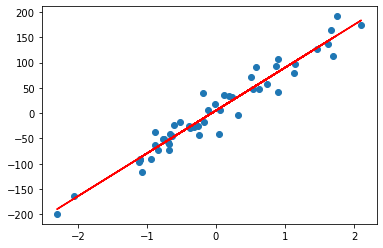

In [219]:
plt.scatter(X, y)
plt.plot(X, np.dot(X, beta[1:]) + beta[0] * np.ones(len(y)), c='red')